In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Humanoid-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(12686, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(14467, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,17-05-2023 19:49:12,200,0,200,0.009941,7,12,False,53.432418,53.432418,53.432418,53.432418,53.432418,COMPER
1,1,2,Humanoid-v4,17-05-2023 19:58:35,400,0,400,0.019882,15,22,False,110.430383,81.931401,81.931401,81.931401,81.931401,COMPER
2,1,3,Humanoid-v4,17-05-2023 20:08:27,600,0,600,0.029822,27,6,False,23.851978,62.571593,62.571593,62.571593,62.571593,COMPER
3,1,4,Humanoid-v4,17-05-2023 20:18:32,800,0,800,0.039763,39,9,False,37.971498,56.421569,56.421569,56.421569,56.421569,COMPER
4,1,5,Humanoid-v4,17-05-2023 20:28:42,1000,0,1000,0.049704,50,5,False,19.496558,49.036567,49.036567,49.036567,49.036567,COMPER
5,1,6,Humanoid-v4,17-05-2023 20:38:54,1200,0,1200,0.059645,59,23,False,98.143032,57.220978,57.220978,57.220978,57.220978,COMPER
6,1,7,Humanoid-v4,17-05-2023 20:49:11,1400,0,1400,0.069586,69,9,False,39.078939,54.629258,54.629258,54.629258,54.629258,COMPER
7,1,8,Humanoid-v4,17-05-2023 20:59:22,1600,0,1600,0.079526,80,5,False,19.225924,50.203841,50.203841,50.203841,50.203841,COMPER
8,1,9,Humanoid-v4,17-05-2023 21:09:41,1800,0,1800,0.089467,85,75,False,378.005205,86.626215,86.626215,86.626215,86.626215,COMPER
9,1,10,Humanoid-v4,17-05-2023 21:20:07,2000,0,2000,0.099408,93,12,False,52.386400,83.202234,83.202234,83.202234,83.202234,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,10-06-2023 14:55:43,47,48,0,0.002336,1,48,True,232.690984,232.690984,232.690984,232.690984,232.690984,DDPG
1,1,2,Humanoid-v4,10-06-2023 14:55:45,71,72,0,0.003529,2,25,True,114.446636,173.568810,173.568810,173.568810,173.568810,DDPG
2,1,3,Humanoid-v4,10-06-2023 14:55:46,87,88,0,0.004324,3,17,True,77.575973,141.571198,141.571198,141.571198,141.571198,DDPG
3,1,4,Humanoid-v4,10-06-2023 14:55:47,103,104,0,0.005120,4,17,True,77.717489,125.607771,125.607771,125.607771,125.607771,DDPG
4,1,5,Humanoid-v4,10-06-2023 14:55:49,119,120,0,0.005915,5,17,True,77.768856,116.039988,116.039988,116.039988,116.039988,DDPG
5,1,6,Humanoid-v4,10-06-2023 14:55:50,135,136,0,0.006710,6,17,True,78.129511,109.721575,109.721575,109.721575,109.721575,DDPG
6,1,7,Humanoid-v4,10-06-2023 14:55:52,151,152,0,0.007505,7,17,True,77.923040,105.178927,105.178927,105.178927,105.178927,DDPG
7,1,8,Humanoid-v4,10-06-2023 14:55:53,167,168,0,0.008301,8,17,True,77.820853,101.759168,101.759168,101.759168,101.759168,DDPG
8,1,9,Humanoid-v4,10-06-2023 14:55:55,183,184,0,0.009096,9,17,True,77.674451,99.083088,99.083088,99.083088,99.083088,DDPG
9,1,10,Humanoid-v4,10-06-2023 14:55:56,200,201,0,0.009941,10,18,True,82.766889,97.451468,97.451468,97.451468,97.451468,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,17-05-2023 19:49:12,200,0,200,0.009941,7,12,False,53.432418,53.432418,53.432418,53.432418,53.432418,COMPER
1,1,2,Humanoid-v4,17-05-2023 19:58:35,400,0,400,0.019882,15,22,False,110.430383,81.931401,81.931401,81.931401,81.931401,COMPER
2,1,3,Humanoid-v4,17-05-2023 20:08:27,600,0,600,0.029822,27,6,False,23.851978,62.571593,62.571593,62.571593,62.571593,COMPER
3,1,4,Humanoid-v4,17-05-2023 20:18:32,800,0,800,0.039763,39,9,False,37.971498,56.421569,56.421569,56.421569,56.421569,COMPER
4,1,5,Humanoid-v4,17-05-2023 20:28:42,1000,0,1000,0.049704,50,5,False,19.496558,49.036567,49.036567,49.036567,49.036567,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
2828,5,2829,Humanoid-v4,12-06-2023 10:28:53,49963,49964,0,0.999,2594,16,True,73.600878,90.709177,73.175242,78.808951,73.274849,DDPG
2829,5,2830,Humanoid-v4,12-06-2023 10:29:10,49978,49979,0,0.999,2595,16,True,73.741219,90.703182,73.176912,78.836008,73.318099,DDPG
2830,5,2831,Humanoid-v4,12-06-2023 10:29:28,49993,49994,0,0.999,2596,16,True,73.359504,90.697055,73.171548,78.857687,73.265807,DDPG
2831,5,2832,Humanoid-v4,12-06-2023 10:29:36,50000,50001,0,0.999,2597,8,True,33.833758,90.676976,72.770840,79.437454,69.261911,DDPG
2832,5,2833,Humanoid-v4,12-06-2023 10:29:38,50001,50002,0,0.999,2598,2,True,4.817976,90.646670,72.081105,78.073666,62.359975,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

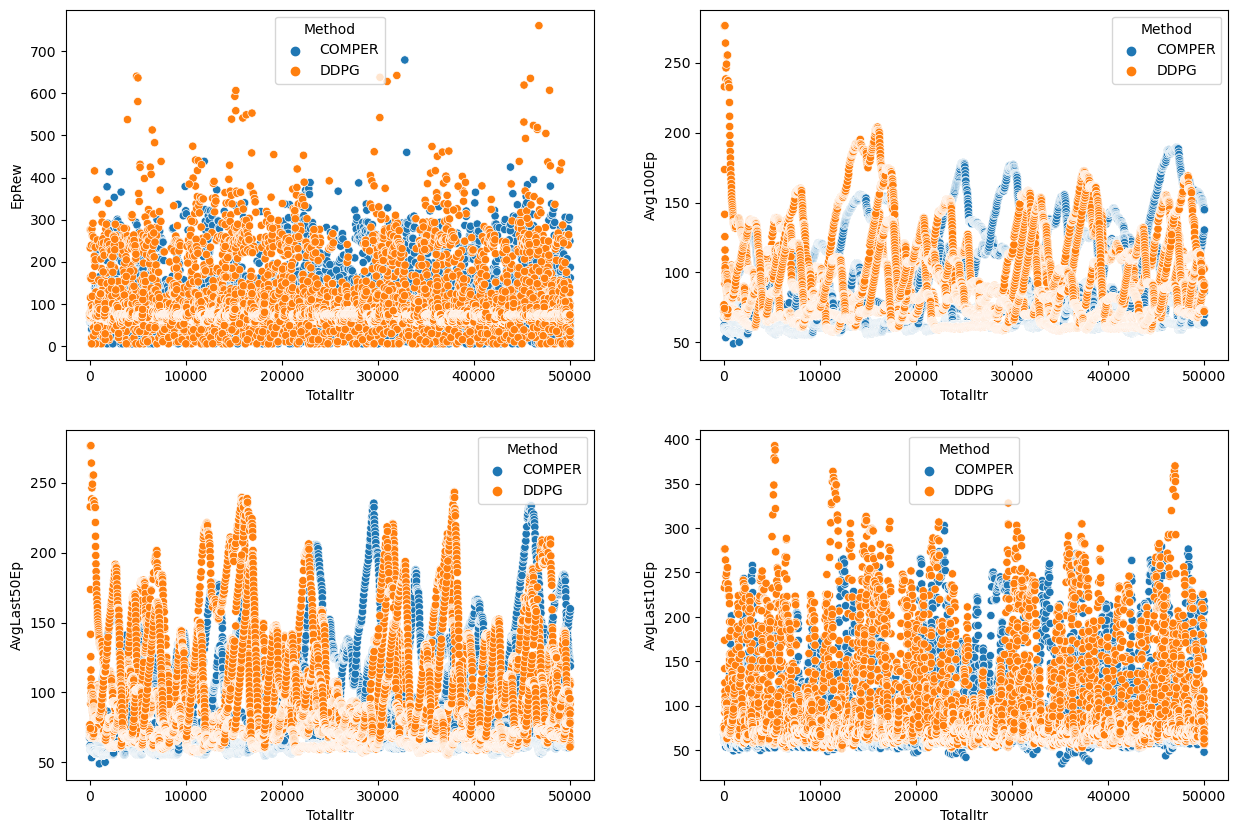

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

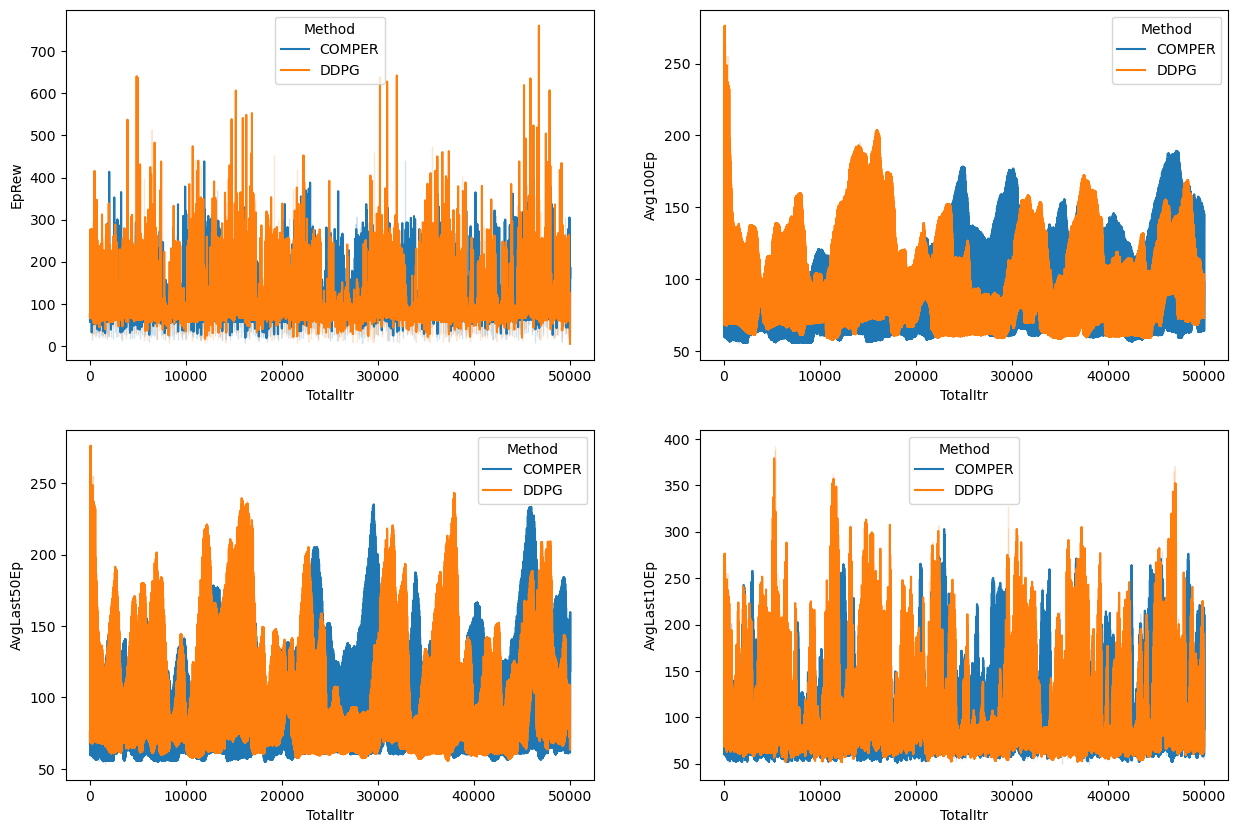

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [12]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,17-05-2023 23:56:21,Humanoid-v4,5000,26.026164,COMPER
1,1,18-05-2023 04:18:38,Humanoid-v4,10000,26.017717,COMPER
2,1,18-05-2023 08:52:21,Humanoid-v4,15000,25.973219,COMPER
3,1,18-05-2023 13:36:54,Humanoid-v4,20000,26.024145,COMPER
4,1,18-05-2023 18:34:59,Humanoid-v4,25000,25.958576,COMPER


In [13]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.005455
std,1.428571,14507.211437,0.043666
min,1.000000,5000.000000,25.903504
25%,2.000000,15000.000000,25.971965
50%,3.000000,27500.000000,26.009584
75%,4.000000,40000.000000,26.033586
max,5.000000,50000.000000,26.091451


In [14]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,10-06-2023 15:06:23,Humanoid-v4,5000,26.010854,DDPG
1,1,10-06-2023 15:25:17,Humanoid-v4,10000,26.032528,DDPG
2,1,10-06-2023 15:54:26,Humanoid-v4,15000,26.040588,DDPG
3,1,10-06-2023 16:32:54,Humanoid-v4,20000,26.051401,DDPG
4,1,10-06-2023 17:20:42,Humanoid-v4,25000,26.067295,DDPG


In [15]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.007037
std,1.428571,14507.211437,0.043674
min,1.000000,5000.000000,25.919321
25%,2.000000,15000.000000,25.972083
50%,3.000000,27500.000000,26.011175
75%,4.000000,40000.000000,26.040304
max,5.000000,50000.000000,26.094292


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

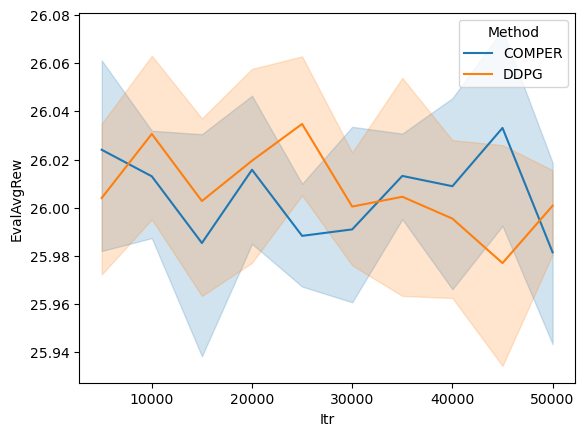

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')